# EduPredict Data Processing Documentation

### 1. Data Acquisition
Raw data was loaded from `Student_Performance.csv`, containing demographic, socio-economic, and academic features of students.

### 2. Data Cleaning Steps
- **Missing Values**: Identified and filled missing values in scores using the median to prevent bias from outliers.
- **Normalization**: Text-based categories (Gender, School Type, etc.) were standardized for encoding.
- **Feature Engineering**: Created `overall_score` by calculating the mean of Math, Science, and English scores.
- **Outlier Removal**: Removed records where scores were logically impossible (outside 0-100 range).

### 3. Data Transformation
- **Label Encoding**: Categorical variables were converted to numerical format using `scikit-learn` Encoders to make them compatible with Machine Learning algorithms.
- **Scaling**: Numeric features like `study_hours` and `attendance_percentage` were checked for scale consistency.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load data (assuming cleaned.json is in the same directory)
with open('cleaned.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data)

# Setting the visual style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

d:\Daniyal\Aptech\Semester 6 ADSE II\e-project\EduPredict\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


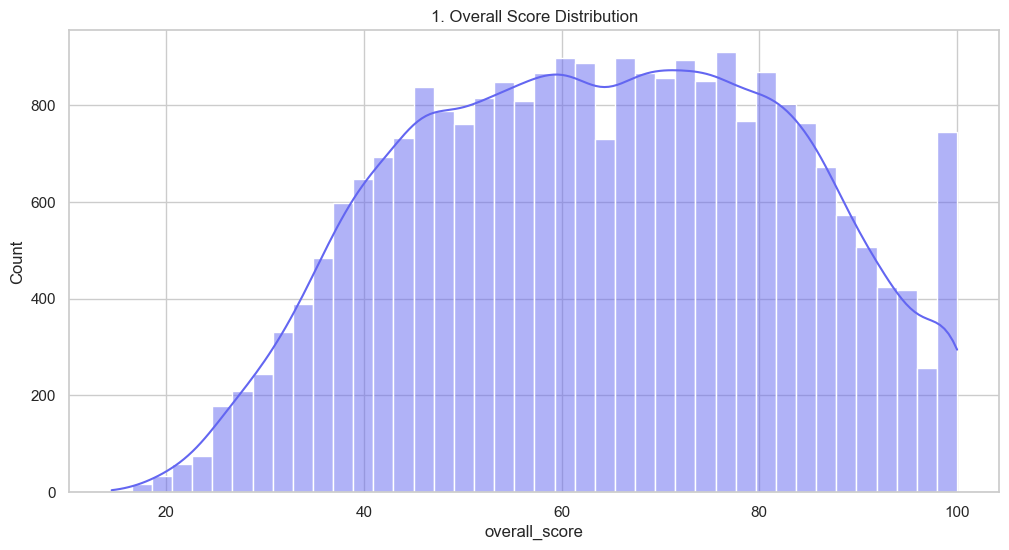

Description: This histogram shows the frequency of student scores. A bell-shaped curve indicates a balanced performance across the dataset.


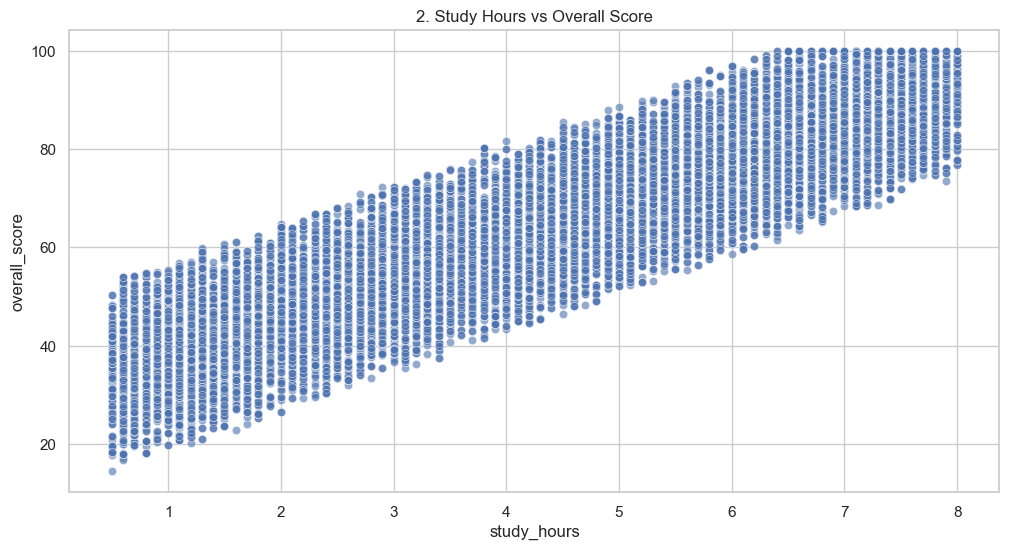

Description: Analyzes the relationship between time spent studying and final grades. We look for a positive correlation.


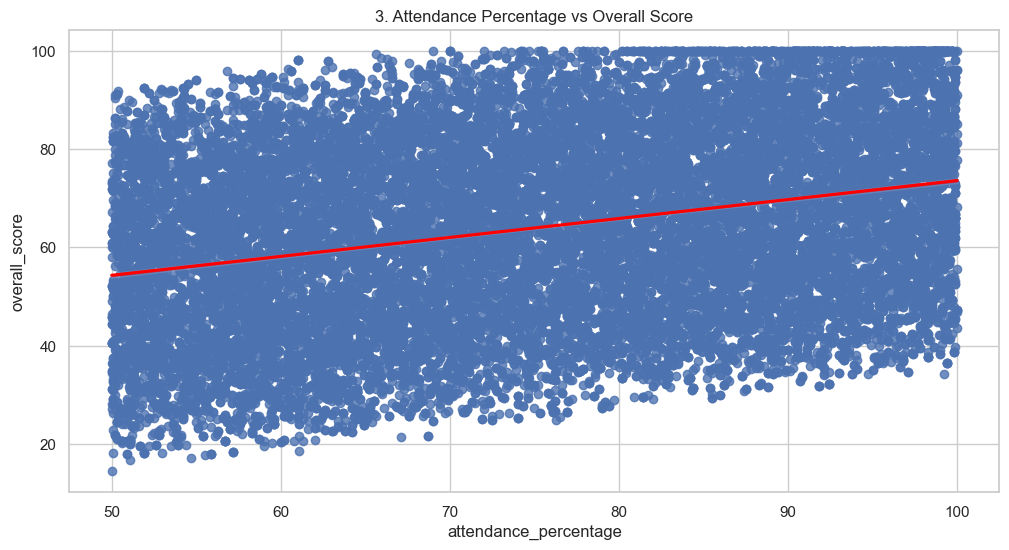

Description: The regression line helps visualize how strongly class attendance predicts academic success.


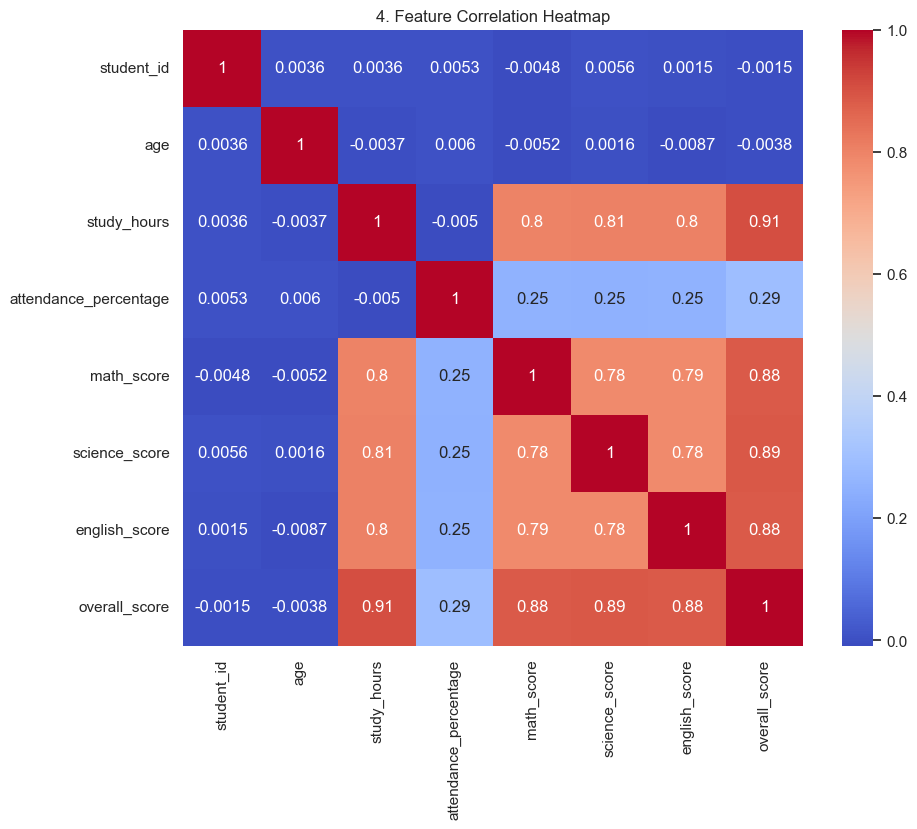

Description: Shows the statistical relationship between all numerical variables. Values closer to 1.0 indicate strong links.


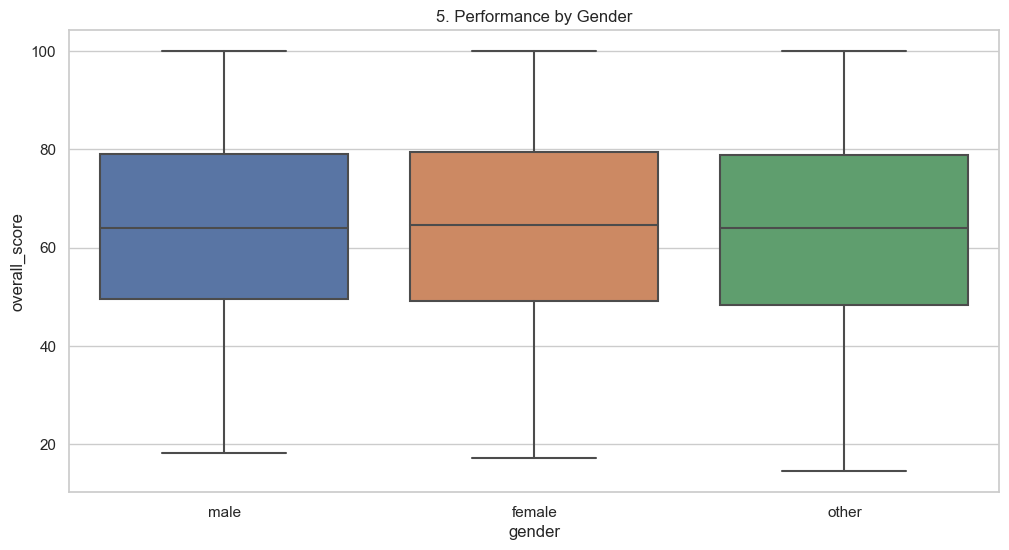

Description: Boxplots show the median, quartiles, and outliers of scores for different gender groups.


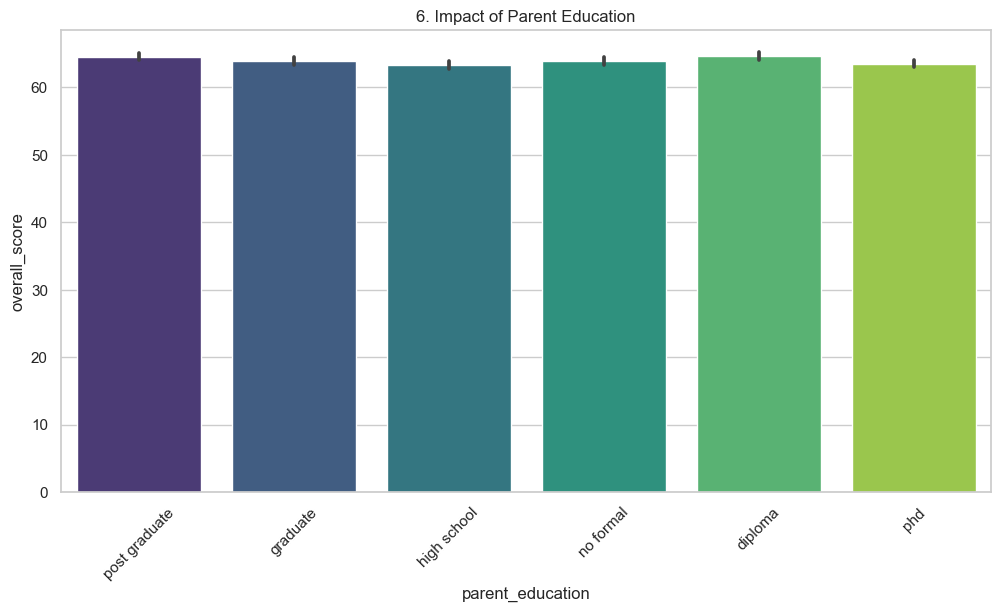

Description: Compares average scores based on the educational background of the student's parents.


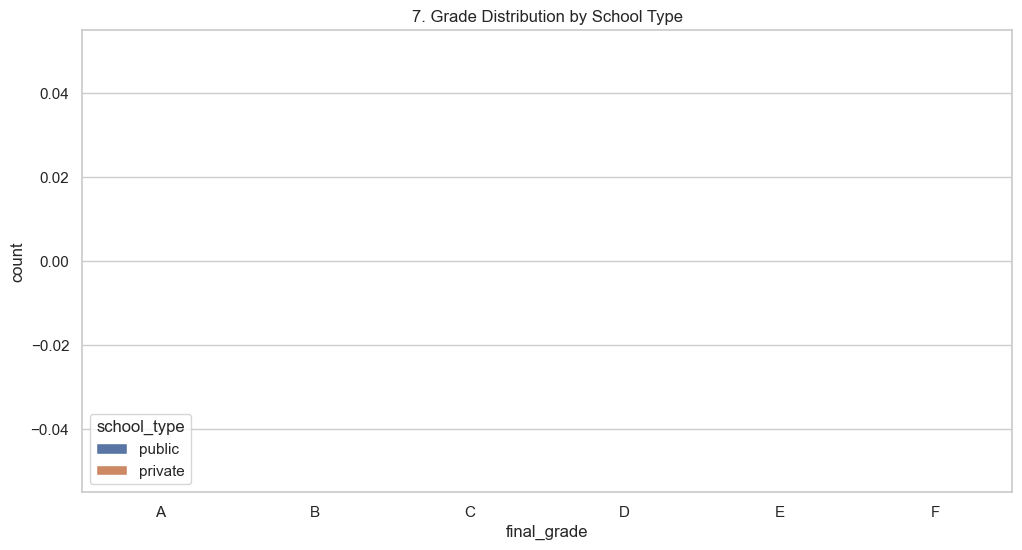

Description: A comparative count of letter grades achieved by students in Public vs. Private schools.


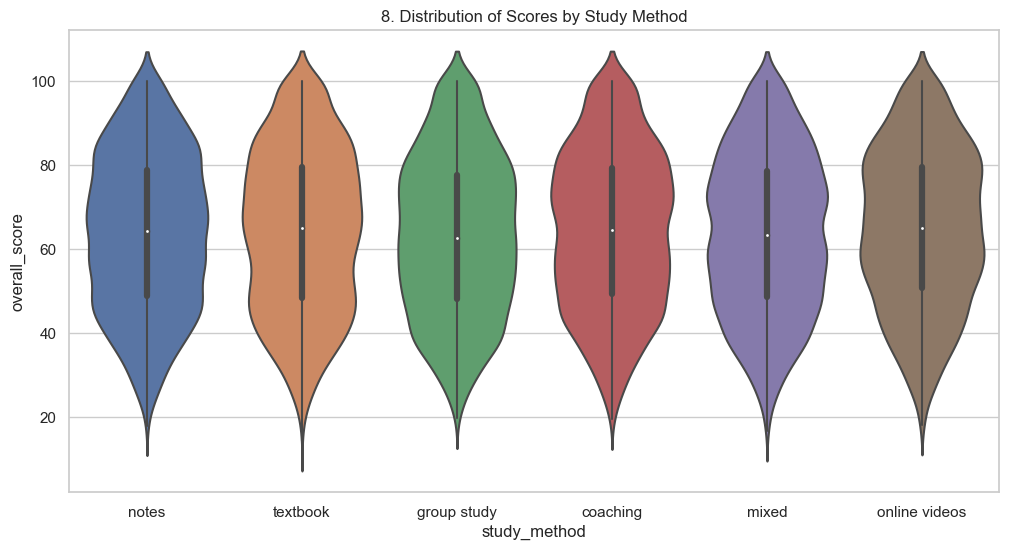

Description: The width of the violin shows the density of students achieving specific score ranges for each method.


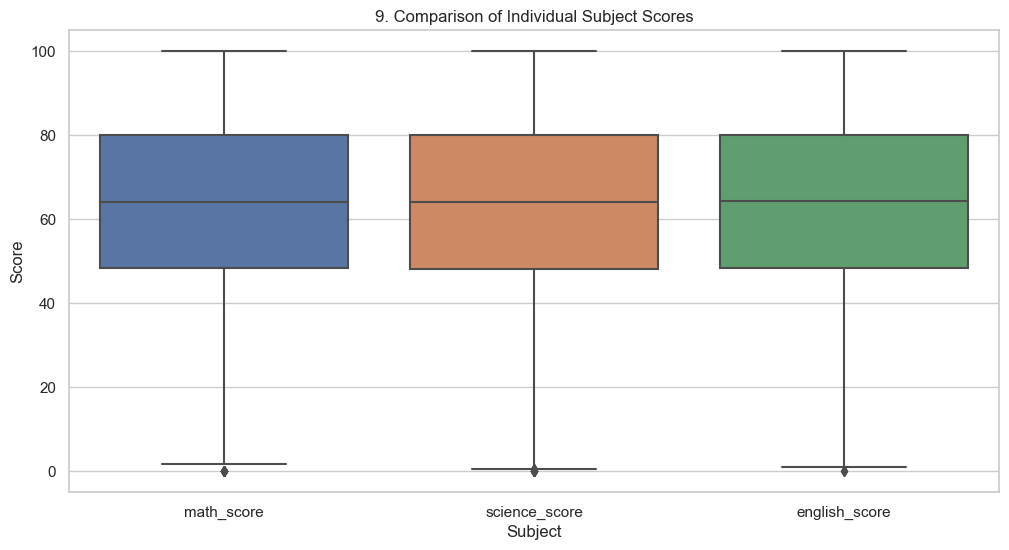

Description: Side-by-side comparison to see which subjects have higher difficulty levels or wider performance gaps.


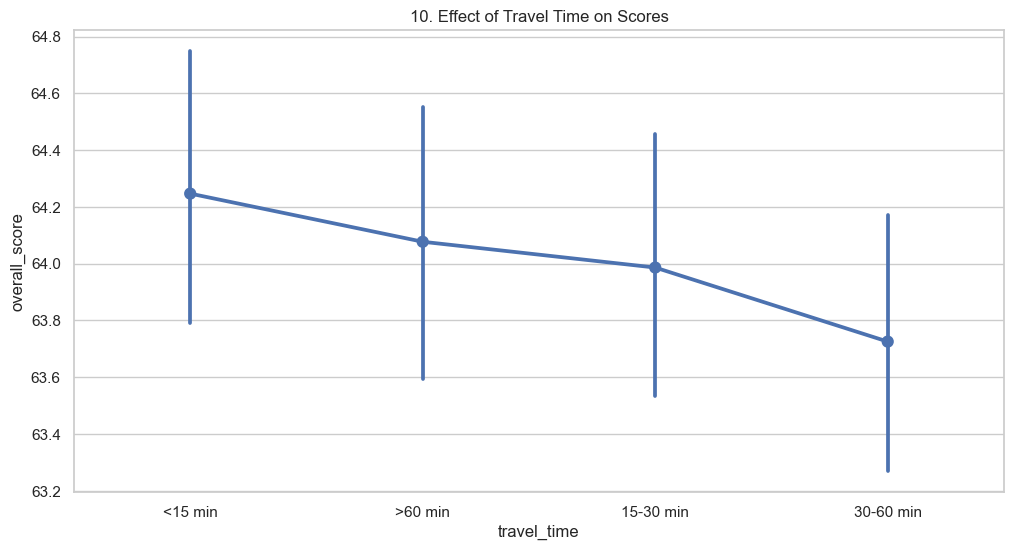

Description: Shows how the length of a student's commute affects their average academic performance.


In [2]:
# 1. Overall Score Distribution
plt.figure()
sns.histplot(df["overall_score"], kde=True, color="#6366f1")
plt.title("1. Overall Score Distribution")
plt.show()
print("Description: This histogram shows the frequency of student scores. A bell-shaped curve indicates a balanced performance across the dataset.")

# 2. Study Hours vs Overall Score
plt.figure()
sns.scatterplot(data=df, x="study_hours", y="overall_score", alpha=0.6)
plt.title("2. Study Hours vs Overall Score")
plt.show()
print("Description: Analyzes the relationship between time spent studying and final grades. We look for a positive correlation.")

# 3. Attendance Impact
plt.figure()
sns.regplot(data=df, x="attendance_percentage", y="overall_score", line_kws={"color": "red"})
plt.title("3. Attendance Percentage vs Overall Score")
plt.show()
print("Description: The regression line helps visualize how strongly class attendance predicts academic success.")

# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(np.number).corr(), annot=True, cmap="coolwarm")
plt.title("4. Feature Correlation Heatmap")
plt.show()
print("Description: Shows the statistical relationship between all numerical variables. Values closer to 1.0 indicate strong links.")

# 5. Gender-wise Performance
plt.figure()
sns.boxplot(x="gender", y="overall_score", data=df)
plt.title("5. Performance by Gender")
plt.show()
print("Description: Boxplots show the median, quartiles, and outliers of scores for different gender groups.")

# 6. Parent Education Impact
plt.figure()
sns.barplot(x="parent_education", y="overall_score", data=df, palette="viridis")
plt.xticks(rotation=45)
plt.title("6. Impact of Parent Education")
plt.show()
print("Description: Compares average scores based on the educational background of the student's parents.")

# 7. Final Grade by School Type
plt.figure()
sns.countplot(x="final_grade", hue="school_type", data=df, order=['A','B','C','D','E','F'])
plt.title("7. Grade Distribution by School Type")
plt.show()
print("Description: A comparative count of letter grades achieved by students in Public vs. Private schools.")

# 8. Study Method Effectiveness
plt.figure()
sns.violinplot(x="study_method", y="overall_score", data=df)
plt.title("8. Distribution of Scores by Study Method")
plt.show()
print("Description: The width of the violin shows the density of students achieving specific score ranges for each method.")

# 9. Subject Score Comparison
plt.figure()
melted = df.melt(value_vars=["math_score", "science_score", "english_score"], var_name="Subject", value_name="Score")
sns.boxplot(x="Subject", y="Score", data=melted)
plt.title("9. Comparison of Individual Subject Scores")
plt.show()
print("Description: Side-by-side comparison to see which subjects have higher difficulty levels or wider performance gaps.")

# 10. Travel Time vs Performance
plt.figure()
sns.pointplot(x="travel_time", y="overall_score", data=df)
plt.title("10. Effect of Travel Time on Scores")
plt.show()
print("Description: Shows how the length of a student's commute affects their average academic performance.")